In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('penguins')  

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
df.shape

(344, 7)

In [8]:
df.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [9]:
df['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [10]:
df['sex'].fillna(method='ffill', inplace=True)

In [11]:
df['sex'].value_counts()

Male      177
Female    167
Name: sex, dtype: int64

In [12]:
df.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                  False
dtype: bool

In [13]:
df[df['bill_length_mm'].isnull() & df['bill_depth_mm'].isnull() & df['flipper_length_mm'].isnull() & df['body_mass_g'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Female
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Female


In [14]:
df[df['bill_length_mm'].isnull() & df['bill_depth_mm'].isnull() & df['flipper_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Female
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Female


In [15]:
df[df['bill_length_mm'].isnull() & df['bill_depth_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Female
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Female


In [16]:
df[df['bill_depth_mm'].isnull() & df['flipper_length_mm'].isnull() & df['body_mass_g'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Female
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Female


In [17]:
df[df['flipper_length_mm'].isnull() & df['body_mass_g'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Female
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Female


In [18]:
df[df['bill_length_mm'].isnull() & df['flipper_length_mm'].isnull() & df['body_mass_g'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Female
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Female


In [19]:
df[df['bill_length_mm'].isnull() & df['body_mass_g'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Female
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Female


In [20]:
df.drop([3,339], axis=0, inplace=True)

In [21]:
df.isna().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [22]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,342,342,342.000000,342.000000,342.000000,342.000000,342
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,151,167,NaN,NaN,NaN,NaN,177
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


Text(0.5, 1.0, 'Histogram of Bill Length')

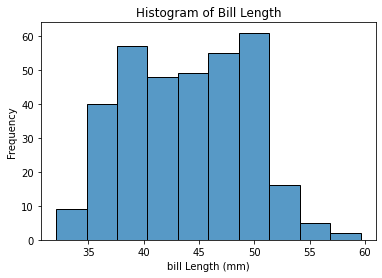

In [40]:
sns.histplot(x='bill_length_mm', data=df, bins=10)

plt.xlabel('bill Length (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Bill Length')


In [25]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

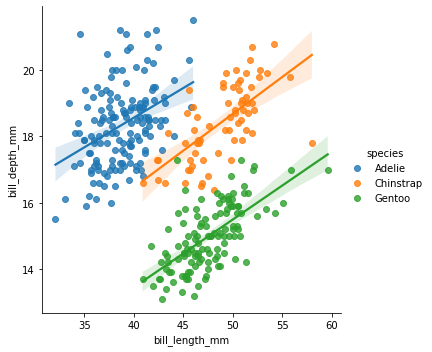

In [28]:
sns.lmplot(x='bill_length_mm', y='bill_depth_mm' , hue='species',  data= df)

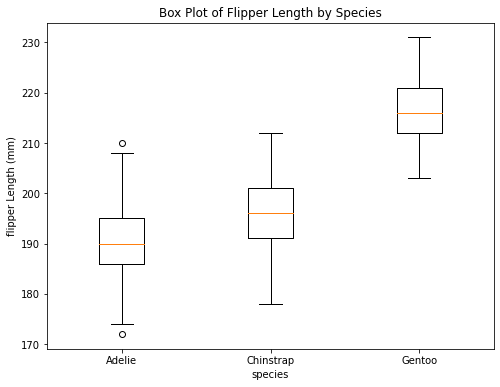

In [29]:
# Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['species'] == species]['flipper_length_mm'] for species in df['species'].unique()],
            labels=df['species'].unique())
plt.xlabel('species')
plt.ylabel('flipper Length (mm)')
plt.title('Box Plot of Flipper Length by Species')
plt.show()

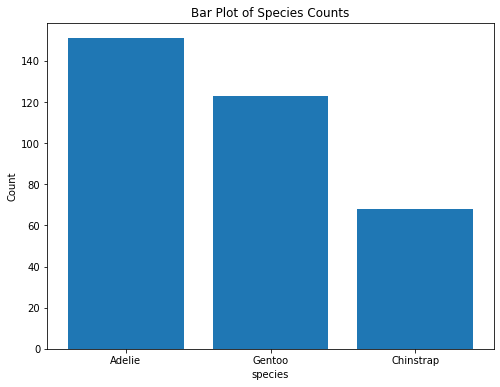

In [30]:
# Bar Plot
plt.figure(figsize=(8, 6))
species_counts = df['species'].value_counts()
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('species')
plt.ylabel('Count')
plt.title('Bar Plot of Species Counts')
plt.show()

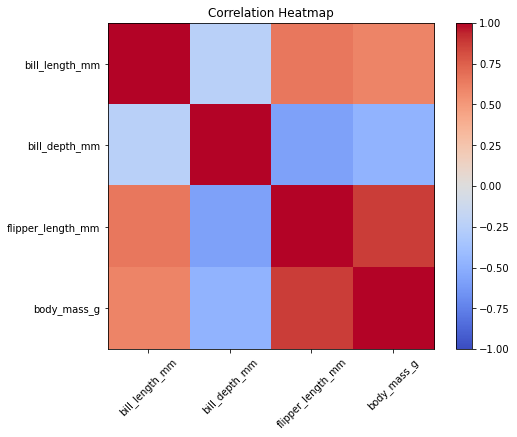

In [33]:
# Heatmap (Correlation)
plt.figure(figsize=(8, 6))
corr_matrix = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Grouping and aggregation
average_body_mass = df.groupby('species')['body_mass_g'].mean()
maximum_bill_length = df.groupby('species')['bill_length_mm'].max()
maximum_flipper_length = df.groupby('species')['flipper_length_mm'].max()

print("Average Body Mass:")
print(average_body_mass)
print("\nMaximum Bill Length:")
print(maximum_bill_length)
print("\nMaximum Flipper Length:")
print(maximum_flipper_length)

Average Body Mass:
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

Maximum Bill Length:
species
Adelie       46.0
Chinstrap    58.0
Gentoo       59.6
Name: bill_length_mm, dtype: float64

Maximum Flipper Length:
species
Adelie       210.0
Chinstrap    212.0
Gentoo       231.0
Name: flipper_length_mm, dtype: float64


In [43]:
average_body_mass = df.groupby('island')['body_mass_g'].mean()
maximum_bill_length = df.groupby('island')['bill_length_mm'].max()
maximum_flipper_length = df.groupby('island')['flipper_length_mm'].max()


print("Average Body Mass:")
print(average_body_mass)
print("\nMaximum Bill Length:")
print(maximum_bill_length)
print("\nMaximum Flipper Length:")
print(maximum_flipper_length)

Average Body Mass:
island
Biscoe       4716.017964
Dream        3712.903226
Torgersen    3706.372549
Name: body_mass_g, dtype: float64

Maximum Bill Length:
island
Biscoe       59.6
Dream        58.0
Torgersen    46.0
Name: bill_length_mm, dtype: float64

Maximum Flipper Length:
island
Biscoe       231.0
Dream        212.0
Torgersen    210.0
Name: flipper_length_mm, dtype: float64


In [46]:
# T-test
male_body_mass = df[df['sex'] == 'Male']['body_mass_g']
female_body_mass = df[df['sex'] == 'Female']['body_mass_g']
t_statistic, p_value = stats.ttest_ind(male_body_mass, female_body_mass)
print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Test Results:
T-Statistic: 8.272089832315558
P-Value: 3.017186216393737e-15


In [47]:
# ANOVA
species_groups = []
for species, group in df.groupby('species')['bill_length_mm']:
    species_groups.append(group)
f_statistic, p_value_anova = stats.f_oneway(*species_groups)
print("\nANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value_anova)


ANOVA Results:
F-Statistic: 410.6002550405077
P-Value: 2.6946137388895484e-91


In [48]:
# ANOVA
species_groups = []
for species, group in df.groupby('species')['flipper_length_mm']:
    species_groups.append(group)
f_statistic, p_value_anova = stats.f_oneway(*species_groups)
print("\nANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value_anova)


ANOVA Results:
F-Statistic: 594.8016274385172
P-Value: 1.3517103385730013e-111


### Conclusion

Based on the provided data results from ANOVA and t-tests, here are some potential business strategies you can consider:

Species' flipper_length_mm: The ANOVA results indicate a highly significant difference in 'flipper_length_mm' among different species (F-Statistic: 594.80, P-Value: 1.35e-111). This suggests that the 'flipper_length_mm' variable plays a significant role in distinguishing between species. As a business strategy, you could leverage this information to develop species-specific products, services, or marketing campaigns tailored to the unique characteristics and needs of each species.

Species' bill_length_mm: Similarly, the ANOVA results for 'bill_length_mm' show a highly significant difference among different species (F-Statistic: 410.60, P-Value: 2.69e-91). This implies that 'bill_length_mm' is an important factor in differentiating species. Using this information, you can consider designing products or services that cater to the specific bill lengths of different species or personalize customer experiences based on species characteristics.

Male and female body mass: The t-test results for male and female body mass demonstrate a significant difference (T-Statistic: 8.27, P-Value: 3.02e-15). This suggests that there is a statistically significant distinction in body mass between males and females. From a business standpoint, you could tailor marketing strategies or product offerings to cater to the differing body mass requirements or preferences of male and female customers.

### Recommendations to organizations

Based on the data provided, organizations can leverage the following analysis to enhance operations and make informed decisions:

- Wildlife Conservation Organizations: The average body mass data reveals differences among penguin species, with Gentoo penguins having the highest average body mass. Conservation organizations can use this information to prioritize conservation efforts, such as focusing on habitat protection and ensuring sufficient food resources for larger species like Gentoo penguins.

- Aquariums and Marine Parks: The maximum bill length data highlights variations among penguin species. Aquariums and marine parks can design exhibits and feeding protocols that accommodate the specific bill lengths of different species, promoting natural foraging behaviors and ensuring optimal nutrition.

- Research Institutions: The maximum flipper length data indicates variations among penguin species. Research institutions can study the relationship between flipper length and swimming abilities to gain insights into the adaptations and performance capabilities of different penguin species, contributing to scientific knowledge and conservation strategies.

- Tourism and Travel Companies: The average body mass data for different islands suggests variations in penguin populations. Tourism and travel companies can develop specialized tour packages that highlight the unique characteristics of each island, allowing visitors to observe and learn about specific penguin species found on each island.

- Educational Institutions: The maximum bill length and flipper length data can be incorporated into educational programs to teach students about penguin adaptations and species diversity. Students can analyze the data to understand how different physical attributes contribute to the survival and behavior of penguins in their respective environments.

By utilizing this information, organizations can tailor their operations, conservation efforts, research, and educational programs to the specific characteristics and needs of different penguin species. This approach promotes effective decision-making, enhances visitor experiences, contributes to scientific knowledge, and fosters a deeper understanding and appreciation for penguins and their habitats.

# The End